<a href="https://colab.research.google.com/github/Jdvilan/suprema-octo-panqueque/blob/circleci-project-setup/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para la solución de la ecuación:
$$\frac{∂\mathcal{U}}{∂t}=\frac{∂^2\mathcal{U}}{∂x^2}$$
Sujeta a las condiciones de frontera:
$$\mathcal{U}(0,t)=\mathcal{U}(1,t)=0,\hspace{1cm}t>0$$
Y la condición inicial:
$$\mathcal{U}(x,0)=2x+1,\hspace{1cm}0<x<1$$
Paso 1:

Suponemos una solución de la forma $\mathcal{U}(x, y) = X(x)T(t)$. Derivamos y al sustituir en la ecuación obtenemos la igualdad:
$$X(x)T'(t)=X''(x)T(t)$$
Como ni $X(x)$ ni $T(t)$ son 0, porque de serlo, también $\mathcal{U}$ lo sería, podemos dividir la última ecuación por $X(x)T(t)$ para obtener:
$$\frac{T'(t)}{T(t)}=\frac{X''(x)}{X(x)}$$
La única forma de que se cumpla la igualdad es que ambos sean iguales a la misma constante. Por conveniencia igualamos a $-\lambda$ y separamos las ecuaciones:
$$T'(t)+\lambda T(t)=0,\hspace{1cm}t>0\hspace{1cm}...(1)$$
$$X''(x)+\lambda X(x)=0,\hspace{1cm}0<x<1\hspace{1cm}...(2)$$
Para completar la separación, acotamos las condiciones de frontera. Notemos que $\mathcal{U}(0,t)=X(0)T(t)=0$ para todo $t>0$. Como $T\neq 0$, se sigue que $X(0)=0$. Analogamente, $\mathcal{U}(1,t)=0$ lleva a la condición $X(1)=0$.

Paso 2:

La ecuación (2) separada es un problema S-L. Sabemos que sus valores propios y sus funciones propias tienen la forma:
$$\lambda_n=(n\pi)^2,\hspace{1cm}X_n(x)=\sin{(n\pi x)},\hspace{1cm}n=1, 2, 3, ...$$
Entonces, para cada $\lambda_n$, de la ecuación (1) encontramos una componente temporal de la solución. Es decir:
$$T_n(t)=C_1e^{-n^2π^2t}$$
Paso 3:

Combinamos las soluciones para tener
$$\mathcal{U}(x,t)=X_n(x)T_n(t)=\sin{(n\pi x)}C_1e^{-n^2π^2t},\hspace{1cm}n=1, 2, 3, ...$$
Por el principio de superposición asumimos que la solución tiene la representacion en serie:
$$\mathcal{U}(x, t)=\sum_{n=1}^{\infty} b_ne^{-n^2π^2t}\sin{(n\pi x)}$$
Pero esta serie es la serie de Fourier en senos, donde:
$$b_n=\frac{2}{L}\int_{0}^{L} f(x)\sin{(\frac{n\pi x}{L})} dx$$
Finalmente la solución esta dada en términos de la serie de Fourier por la expresión:
$$\mathcal{U}(x, t)=\sum_{n=1}^{\infty} \frac{2}{nπ}(1-3(-1)^n)e^{-n^2π^2t}\sin{(n\pi x)}$$
Este problema modela la transferencia de calor en una barra ideal delgada, con k=1.

In [1]:
from pylab import *
from matplotlib import animation,rc 
from IPython.display import HTML 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Para empezar, graficamos la condición inicial.

In [2]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y

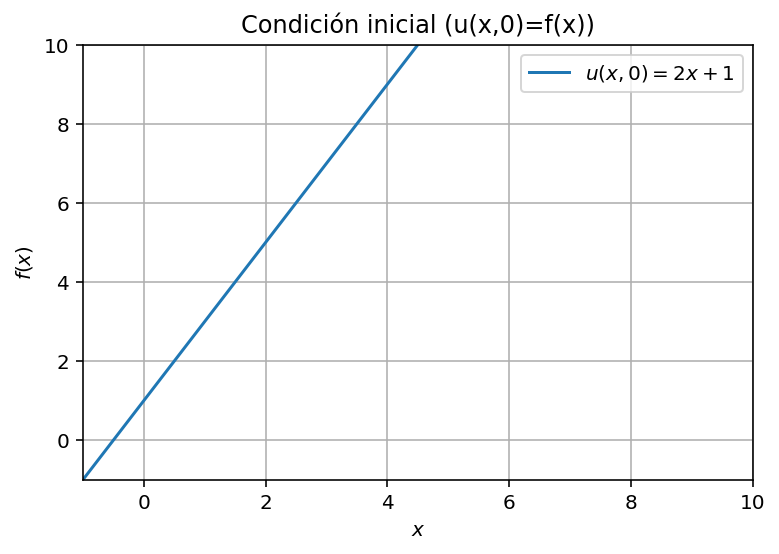

In [13]:
x = linspace(-1,5,1000)
f = 2*recta(x)+1
plot(x,f,label='$u(x,0)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-1,10]),ylim([-1,10]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $\mathcal{U}(x,0)=f(x)=2x+1$

In [4]:
def u_0(x,N=15): 
    f = zeros(len(x))
    for n in range(1,N):
        f += (1-3*(-1)**(n))*sin(n*pi*x)/(n)
    return (2.0/pi)*f

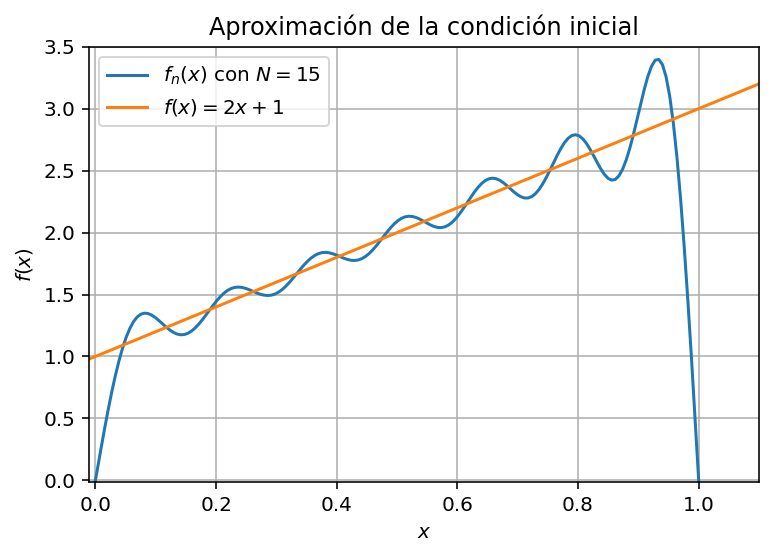

In [5]:
f_n = u_0(x)
plot(x,f_n,label='$f_n(x)$ con $N=15$')
plot(x,f,label='$f(x)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,3.5]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

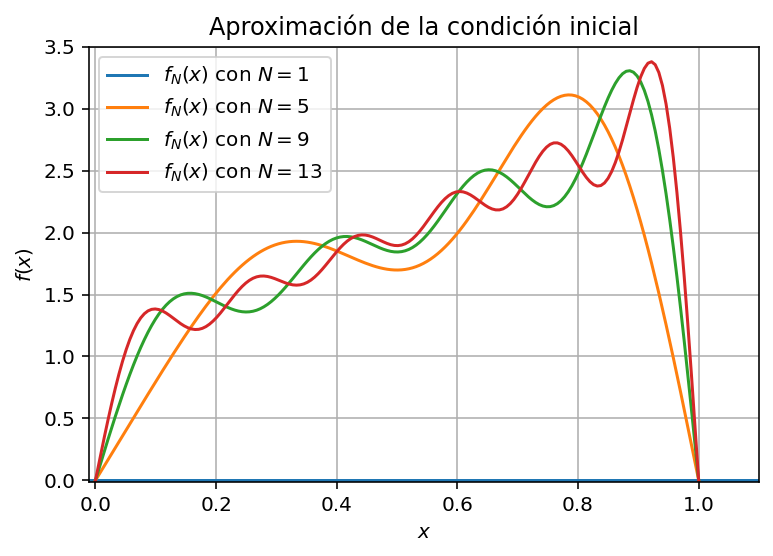

In [6]:
for i in range(1,16,4):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,3.5]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, t=0.

In [7]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (1-3*(-1)**(n))*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [8]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

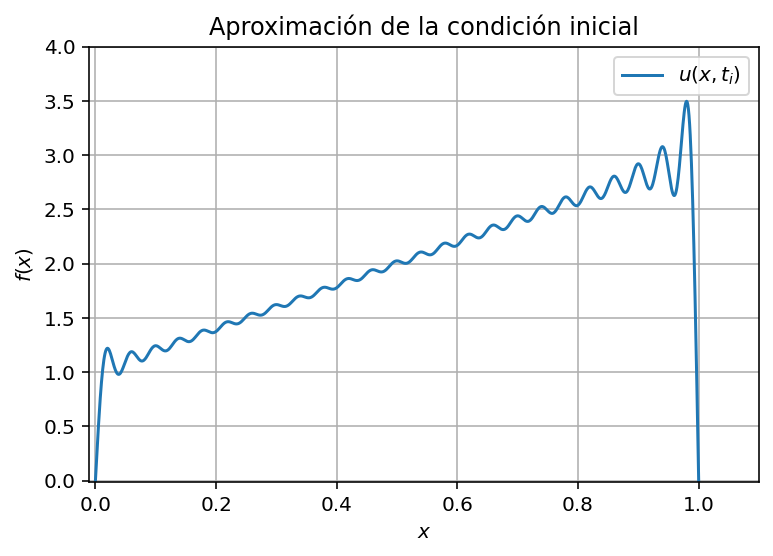

In [9]:
plot(x,U[:,0],label='$u(x,t_i)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,4]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t\rightarrow∞$.

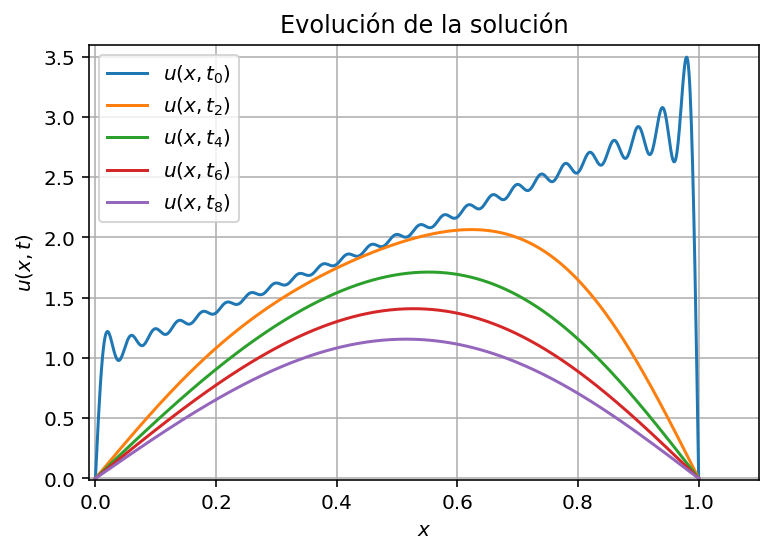

In [10]:
for i in range(0,10,2):
    plot(x,U[:,i],label='$u(x,t_%d)$' %i)
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.1]),ylim([-0.01,3.6]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

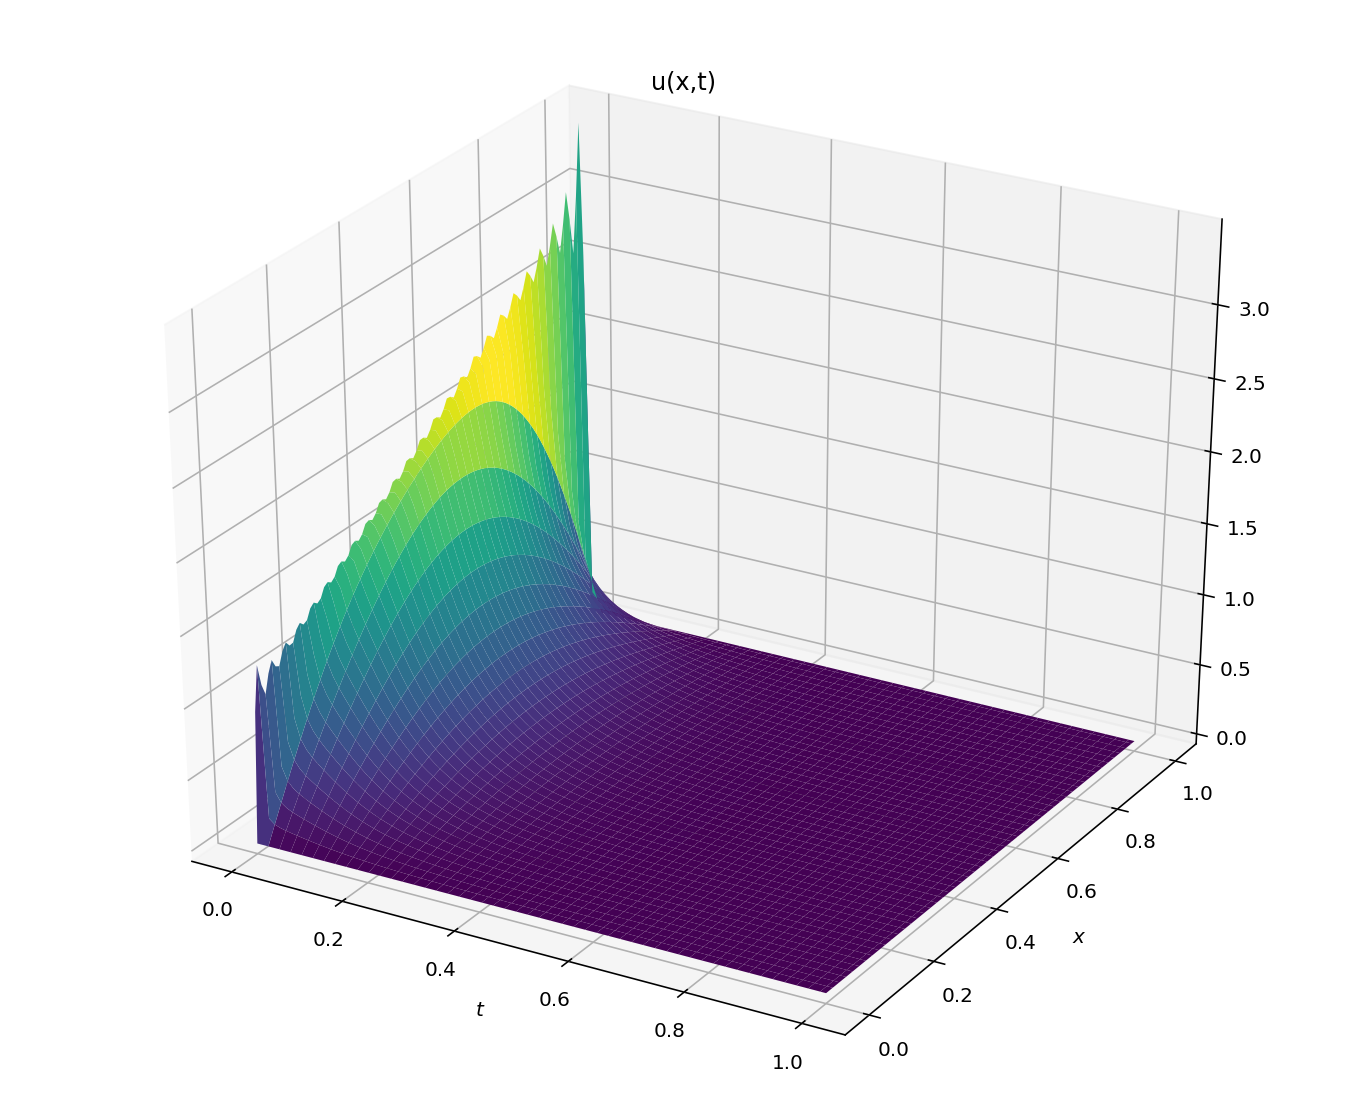

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="viridis");